# Results of different f values

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
results = pd.read_csv('./f_results.csv')
results = results.drop_duplicates(subset='damage')
results = results.groupby(['planner','f','num_agents'], as_index=False).mean()
results.head()

,planner,f,num_agents,num_robots,d,active_time,completion_time,planner_time,damage,num_disabled
0,BottomUpScannerPlanner,1.1,300,10.0,5.0,276.462411,0.006310,68880.286903,57.500,NaN
1,BottomUpScannerPlanner,1.3,300,10.0,5.0,238.500698,0.008292,51528.728602,179.250,NaN
2,BottomUpScannerPlanner,1.5,300,10.0,5.0,208.871099,0.016805,38049.157619,270.125,NaN
3,BottomUpScannerPlanner,1.7,300,10.0,5.0,162.376623,0.010352,27034.245756,300.000,NaN


In [15]:
num_agents = 300

results = results.loc[results['num_agents']==num_agents]

planners_names = ['IterativeAssignmentPlanner', 'KmeansAssignmentPlanner',
                  'StaticLinePlanner', 'BottomUpScannerPlanner']

colors = ['tab:red','tab:brown','tab:blue','tab:orange','tab:green']

planners_results = [results.loc[results['planner']==name] for name in planners_names]

## Experiments

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1
* agent num n is 300

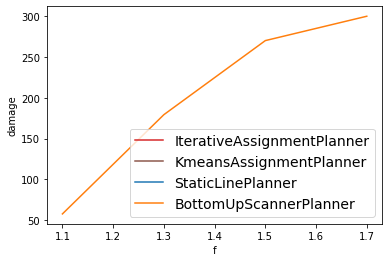

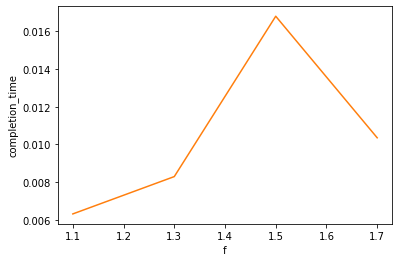

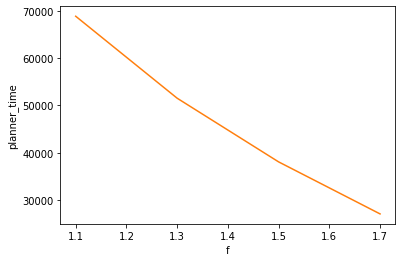

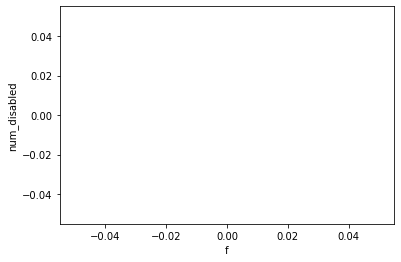

In [16]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['f' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x)
    plt.ylabel(y)

    for j in range(len(planners_results)):
        r = planners_results[j]
        plt.plot(list(r[x]),list(r[y]), c=colors[j])

    if i == 0:
        plt.legend(planners_names, fontsize='14')

    plt.savefig(f'./plots/{x}-{y}.png')
    plt.show()